In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 
import numpy as np
from sklearn.decomposition import PCA

In [2]:
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_new = df[["Age","Annual_Income_(k$)","Spending_Score"]]
df_new.head()

,Age,Annual_Income_(k$),Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
df_new.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df_new.isna().sum()

Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

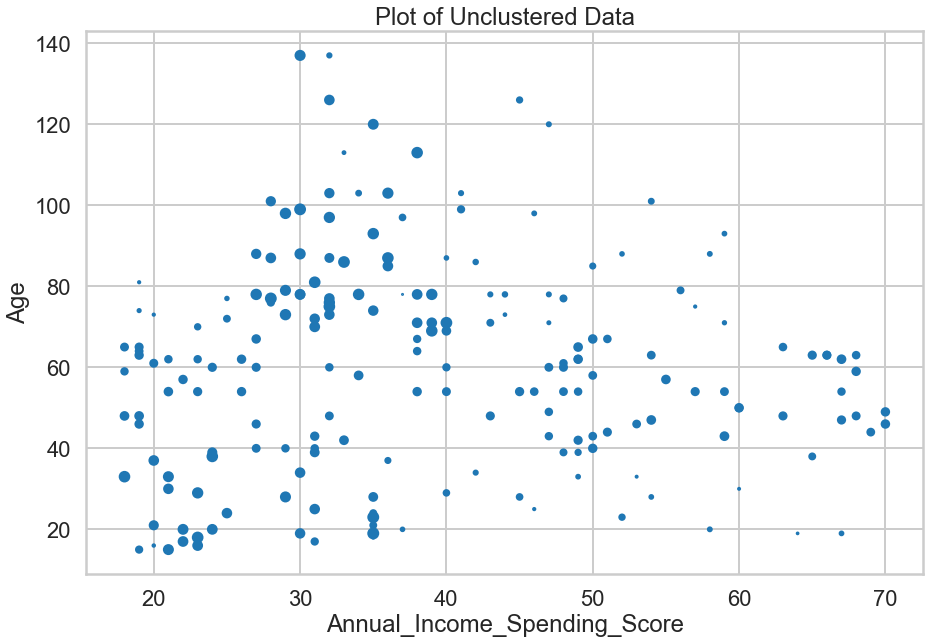

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1], df_new.iloc[:,2])
plt.xlabel('Annual_Income_Spending_Score')
plt.ylabel('Age')
plt.title('Plot of Unclustered Data')
plt.show()

In [11]:
k = 3
np.random.seed(40)
random_centroids=[]
for i in range(1,k+1):
    random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


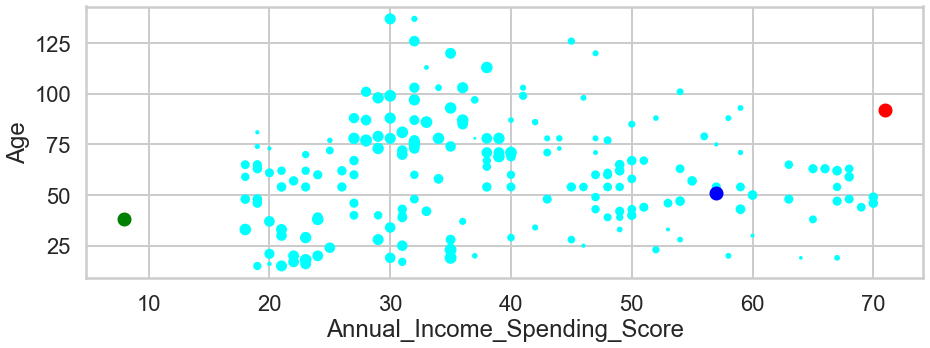

In [12]:
plt.figure(figsize=(15, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], df_new.iloc[:,2], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
    plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('Annual_Income_Spending_Score')
plt.ylabel('Age')
plt.show()

In [13]:
def assignment(df_new,random_centroids):
    for i in range(length) :
        df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2)+ (df_new.iloc[:,2] - random_centroids[i][1]) ** 2)
   
    list1=[]
    list2=[]
    list3=[]
    for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
        d = min(a,b,c)
   
        if d == a:
          list1.append(0)
          list2.append('r')
          list3.append('x')
        elif d == b:
          list1.append(1)
          list2.append('g')
          list3.append('y')
        else:
          list1.append(2)
          list2.append('b')
          list3.append('z')
    df_new['Closest_Centroid'] = list1
    df_new['Color']=list2
    df_new['axes']=list3

    return df_new 

In [14]:
df_new = assignment(df_new, random_centroids)
df_new.head()

C:\Users\venua\AppData\Local\Temp\ipykernel_28108\3271777640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2)+ (df_new.iloc[:,2] - random_centroids[i][1]) ** 2)


,Age,Annual_Income_(k$),Spending_Score,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color,axes
0,19,15,39,2901.913939,26.495098,196.345009,1,g,y
1,21,15,81,212.809586,1875.419690,950.911688,0,r,x
2,20,16,6,7487.525953,1049.059928,2075.931326,1,g,y
3,23,16,77,314.888820,1547.627054,724.795492,0,r,x
4,31,17,40,2789.000000,35.144823,163.801869,1,g,y


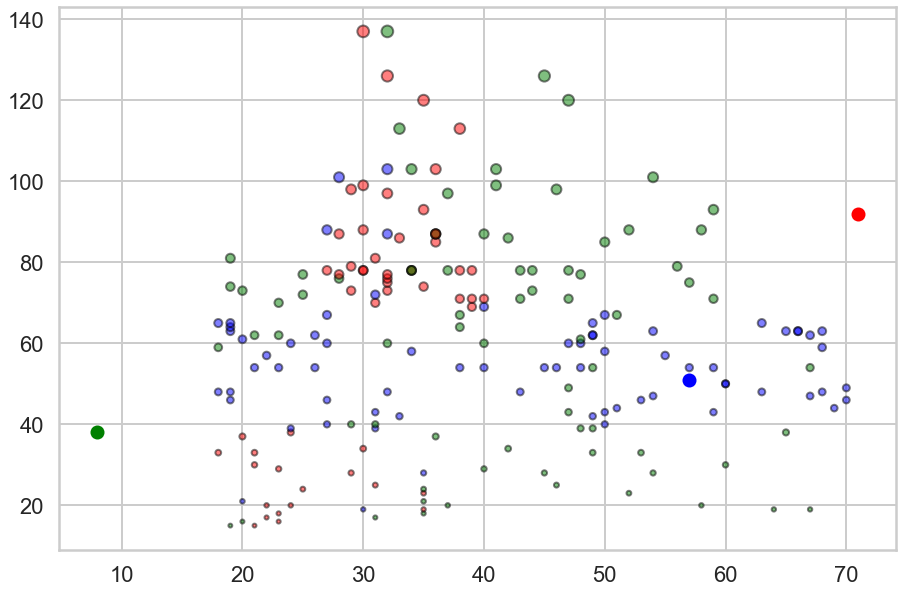

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
    plt.scatter(*random_centroids[i],color=colors1[i])

In [64]:
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Age'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i][['Annual_Income_(k$)']])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Spending_Score'])

        
    return parameter

In [65]:
random_centroids = update(random_centroids)
random_centroids


[[30.0, 82.06896551724138],
 [42.95744680851064, 14.595744680851064],
 [42.22105263157895, 48.357894736842105]]

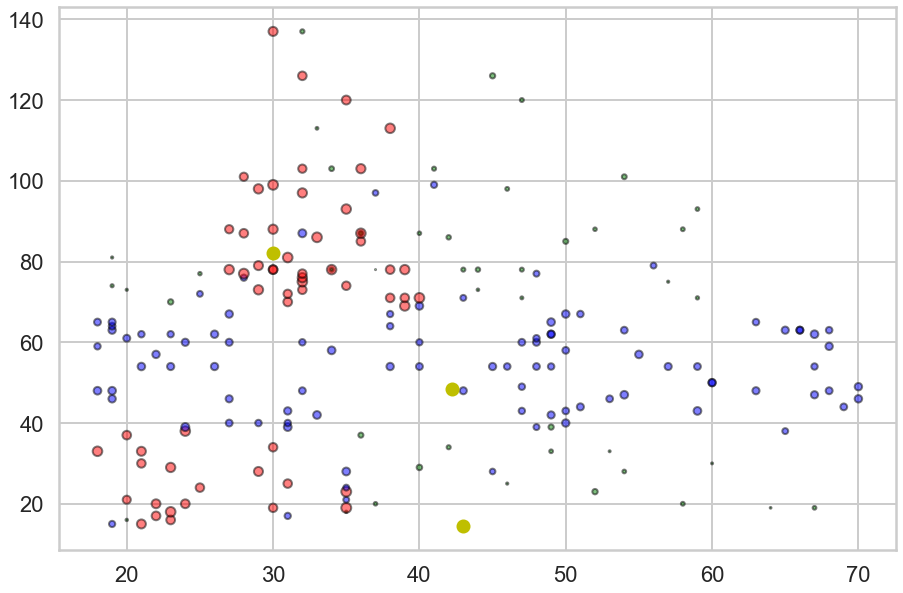

In [66]:
df_new = assignment(df_new, random_centroids)  
df_new.head()
plt.figure(figsize=(15, 10))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1],df_new.iloc[:,2], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
    plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [67]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)#np.allclose() function checks if two arrays are equal element-wise
  print(result)
  if result == True:
    break
  
    
print(count)

Old Centroid [[30. 82.]
 [43. 15.]
 [42. 48.]]
New Centroid [[30. 82.]
 [43. 15.]
 [42. 48.]]
True
2


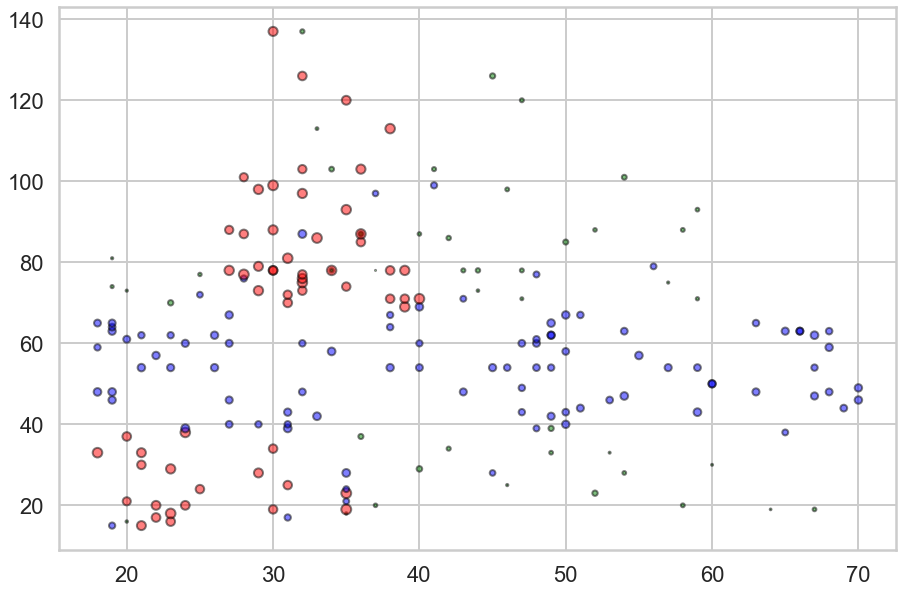

In [68]:
plt.figure(figsize=(15 , 10))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], df_new.iloc[:,2],color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [69]:
df.head()

,Annual_Income_(k$),Age,Spending_Score
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


In [70]:
df = df[["Annual_Income_(k$)","Age",'Spending_Score']]
df.head()

,Annual_Income_(k$),Age,Spending_Score
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


In [71]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(df)

KMeans(n_clusters=3)

In [72]:
labels = kmeans.predict(df)
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [73]:
centroids = kmeans.cluster_centers_
centroids

array([[87.        , 40.39473684, 18.63157895],
       [44.15447154, 40.32520325, 49.82926829],
       [86.53846154, 32.69230769, 82.12820513]])

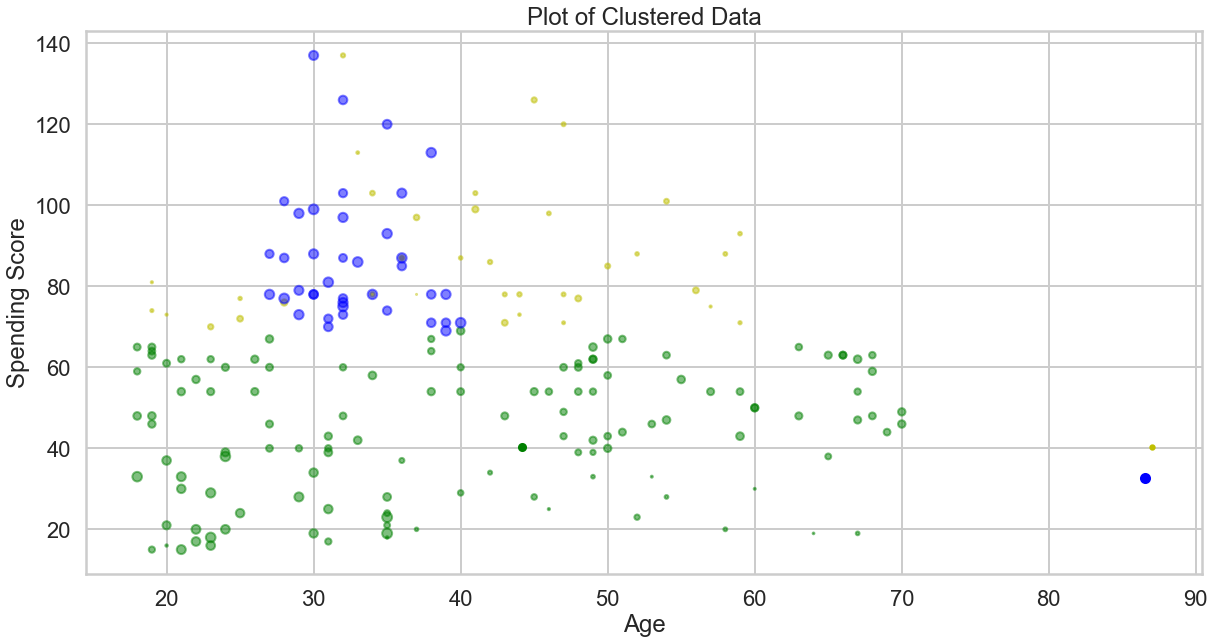

In [74]:
plt.figure(figsize=(20, 10))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['Age'], df['Annual_Income_(k$)'],df['Spending_Score'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

In [75]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)


C:\Users\venua\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
inertia_list


[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58302.40630860365,
 51084.50595493435,
 44342.31739341741,
 40616.41312064748,
 37799.43961775711,
 34233.77903422005,
 31979.278309145335,
 30496.078713450304,
 27649.01938135393,
 26201.327827727837,
 25120.38939589823,
 23311.95312054647,
 22175.256935466492,
 21253.569005994003,
 19843.42314264682]

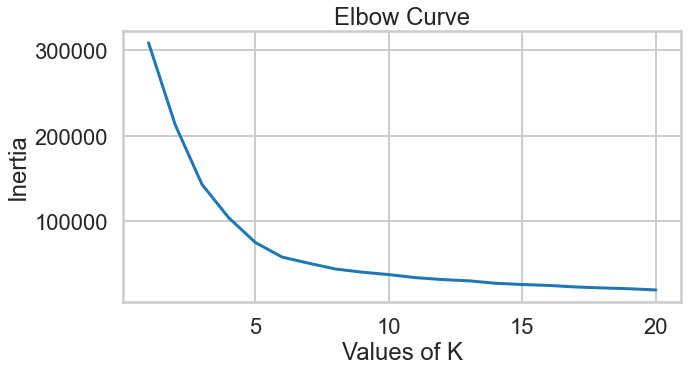

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()
